{[Click here to read this notebook in Google Colab](https://colab.research.google.com/drive/1L3eYIdswCK_0SIY3TT2ZyyB-qB67VZdb)}

<head><link rel = "stylesheet" href = "https://drive.google.com/uc?id=1zYOH-_Mb9jOjRbQmghdhsmZ2g6xAwakk"></head>

<table class = "header"><tr>
    <th align = "left">EPAT Batch 45 | PBQ 1, 2020\03\02</th>
    <th align = "right">Written by: Gaston Solari Loudet</th>
</tr></table>

### Introduction to Python

In [79]:
# Libraries to be imported.
import numpy, pandas, scipy.stats, matplotlib.pyplot
matplotlib.pyplot.style.use("https://drive.google.com/uc?id=1TawPXELPzNlySaOx3HT67A-wHwRxuWjQ&")

#### Exercise 1: Factorial

Write a customized function to calculate the factorial of a number. Do not use any inbuilt functions. Create your own.

In [80]:
def factorial(x):
  y = 1
  if (int(x) != float(x)) or (x < 0):
    raise ValueError("Argument must be a positive integer.")
  elif not(x): return(y) # Result is just 1.
  else: # Go multiplying values from 1 to x.
    for n in range(int(x)): y = y*(n + 1)
  return(y)

# To try some values...
try:
  x = float(input("Factorial of "))
  print("...is %d." % factorial(x))
except: print("Enter number!!!!!!")

...is 479001600.


#### Exercise 2: Uniform distribution random-value plot.

Write a Python program to generate a sequence of 1000 numbers drawn from a standard uniform distribution and plot it on a chart. Compute its mean. Use the "``np.where``" clause to create a sequence of only numbers greater than ``0.75`` from the list. Plot a chart of those numbers. Check how many such numbers exist. Is it on expected lines? Comment. Please use "``np.random.seed(1234)``" at the beginning of your code. 

Comments:
--------
There are 251 numbers greater than 0.75.
There should be 252 of those, in theory.
Difference between both is around 0.1%
...not that bad!


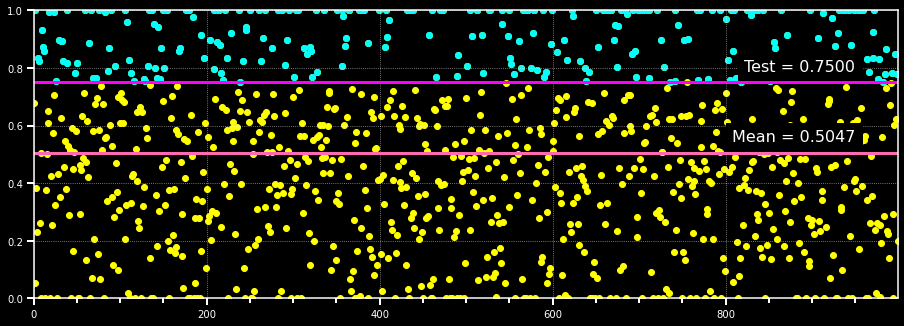

In [89]:
def random_test(n = 1000, cond = 0.75, dist = "uniform"):
    
    numpy.random.seed(1234)
    # Uniformly distributed array:
    X = numpy.linspace(start = 0, stop = n - 1, num = n)
    if (dist == "uniform"): Y = numpy.random.uniform(low = 0, high = 1, size = n)
    if (dist == "normal"): Y = numpy.random.normal(loc = 1/2, scale = cond/2, size = n)
    Y = numpy.clip(a = Y, a_min = 0, a_max = 1, out = Y)
    mean = Y.mean()     ;     I = numpy.where(Y >= cond)     ;     Xs, Ys = X[I], Y[I]
    # Plot object creation & attributes.
    Figure = matplotlib.pyplot.figure();
    Figure.add_axes([0.1, 0.1, 0.8, 0.8]);
    Figure.axes[0].set_xlim(xmin = 0, xmax = n - 1)
    Figure.axes[0].set_ylim(ymin = 0, ymax = 1)
    # Plot sample values and conditional values.
    Figure.axes[0].scatter(marker = "o", x = X, y = Y, color = "yellow");
    Figure.axes[0].scatter(marker = "o", x = Xs, y = Ys, color = "cyan");
    Figure.axes[0].axhline(y = mean, lw = 3, color = "hotpink");
    Figure.axes[0].axhline(y = cond, lw = 3, color = "magenta");
    text_args = {"backgroundcolor": "black", "ha": "right", "fontsize": 16}
    Figure.axes[0].text(x = n*0.95, y = mean + 0.04, s = "Mean = %.4f" % mean, **text_args);
    Figure.axes[0].text(x = n*0.95, y = cond + 0.04, s = "Test = %.4f" % cond, **text_args);
    # General results. Explaining comments to be printed:
    print("Comments:\n--------")
    print(f"There are {len(Ys)} numbers greater than {cond}.")
    real = 1 - (cond if (dist == "uniform") else scipy.stats.norm.cdf(2 - 1/cond))
    print(f"There should be {int(len(Y)*real)} of those, in theory.")
    error = numpy.round(1e4*real/len(Ys))/1e2
    print(f"Difference between both is around {error}%")
    if (error <= 8): print("...not that bad!")
    matplotlib.pyplot.pause(1e-13)
    return Figure

random_test(n = 1000, dist = "normal");

#### Exercise 3: Data frame array dimensions.

Which method/function of pandas displays number of rows and columns? Use it to show the number of rows and columns for the "``TSLA.csv``" file. You can load it into Python similar to how we did it in the lecture.

In [62]:
# Import Tesla market data CSV from my Google Drive.
Data = pandas.read_csv("https://drive.google.com/uc?export=download&id=1CZuIQZV8HwiYlL0BvUVWIZb6eguqIABT", delimiter = ",")
print("Amount of data entries ... %d" % Data.size) # Product of tuple values is equal to ".size".
print("Amount of rows ........... %d" % Data.shape[0])
print("Amount of columns ........ %d" % Data.shape[1])

Amount of data entries ... 13993
Amount of rows ........... 1999
Amount of columns ........ 7


#### Exercise 4: Data frame quick statistics.

Which function of pandas displays summary statistics of the data-frame? What was the highest price reached by the Tesla stock during this period?

In [63]:
Data.describe().round(2) # Function for providing summary statistics.

,Open,High,Low,Close,Adj Close,Volume
count,1999.00,1999.00,1999.00,1999.00,1999.00,1999.00
mean,161.92,164.66,159.05,161.92,161.92,4657162.13
std,111.56,113.13,109.89,111.56,111.56,4252557.16
min,16.14,16.63,14.98,15.80,15.80,118500.00
25%,31.90,32.48,31.10,31.84,31.84,1401600.00
50%,195.69,199.29,192.65,196.12,196.12,3786300.00
75%,246.16,249.40,242.29,246.42,246.42,6200100.00
max,386.69,389.61,379.35,385.00,385.00,37163900.00


In [67]:
print(f"Highest value of Tesla price overall has been {Data['High'].max()}.")

Highest value of Tesla price overall has been 389.609985.


#### Exercise 5: Basic random data classification.

Write a Python program which **iterates** through a sequence of 50 random integers between 100 and 200. Create 2 different objects, one which are even multiples of 3 and which are odd multiples of 5.


In [78]:
# Uniformly distributed array.
Y = numpy.random.randint(low = 50, high = 200, size = 100)
# Show answers. Any repeated integer is filtered.
print(f"Even multiples of 3 --> {set([y for y in Y if ((y % 2 == 0) and (y % 3 == 0))])}")
print(f" Odd multiples of 5 --> {set([y for y in Y if ((y % 2 == 1) and (y % 5 == 0))])}")

Even multiples of 3 --> {96, 162, 102, 168, 174, 78, 84, 150, 54, 120, 156, 126}
 Odd multiples of 5 --> {65, 165, 175, 55, 95}
